# Pymaceuticals Inc.
---

### Analysis

- Capomulin & Ramicane had the most observations.
- Study design has an equal amount of male and female subjects
- Capomulin & Ramicane is the most effective in reducing tumor volume in mouse models over a 45 day period
- Capomulin is effective in reducing tumor volume when compared to mouse weight over a 45 day period
- In the Capomulin cohort, there is a strong correlation between Mouse weight and final tumor volume, suggesting that tumor size correlates with the weight of the mouse, pvalues shows that it is statistically significant.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
print(mouse_metadata.columns)
print(study_results.columns)
df_complete = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
df_complete.head(25)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_count = df_complete['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
g989_duplicates = df_complete[df_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
g989_duplicates.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_all = df_complete[df_complete['Mouse ID'] == 'g989']
g989_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_complete = df_complete[df_complete['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = df_complete['Mouse ID'].nunique()
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
group_categories = ['Drug Regimen', 'Tumor Volume (mm3)']
aggregations = ['mean', 'median', 'var', 'std', 'sem']
df_drug_groups = df_complete[group_categories].groupby('Drug Regimen').agg(aggregations)
df_drug_groups

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

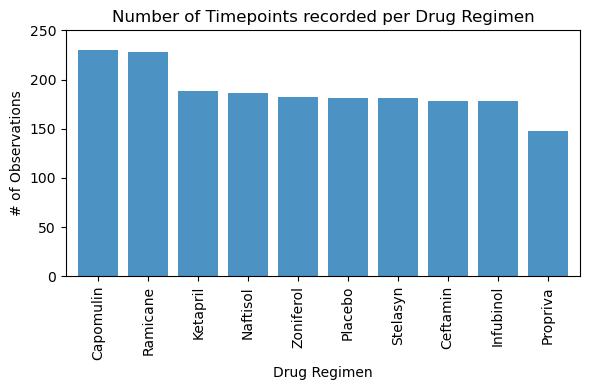

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_per_drug = df_complete.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
timepoints_per_drug_pdplot = timepoints_per_drug.plot.bar(timepoints_per_drug.index, 
                                                        alpha=0.8, 
                                                        width=0.8, 
                                                        figsize=(6,4))
plt.title("Number of Timepoints recorded per Drug Regimen")
plt.ylabel("# of Observations")
plt.ylim(0,250)
plt.tight_layout()
plt.savefig('Images/total_timepoints.png', format='png')


(0.0, 250.0)

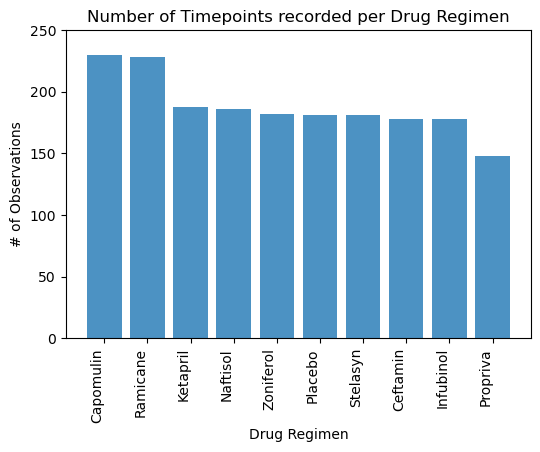

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots(1, figsize = (6,4))
timepoints_per_drug_plt = plt.bar(x=timepoints_per_drug.index, 
                                  height=timepoints_per_drug,
                                  alpha=0.8, 
                                  width=0.8)
plt.title("Number of Timepoints recorded per Drug Regimen")
plt.ylabel("# of Observations")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90, ha='right')
plt.ylim(0,250)

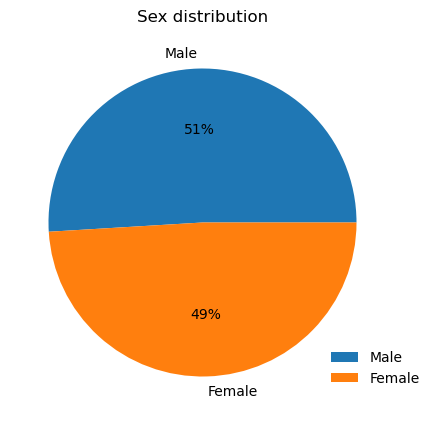

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_proportions = df_complete['Sex'].value_counts(normalize=True)
sex_proportions_pdplt = sex_proportions.plot.pie(autopct='%0.f%%', 
                                                 ylabel="",
                                                 figsize= (5,5), 
                                                 title="Sex distribution")
plt.legend(bbox_to_anchor=(0.8,0.2), frameon=0)

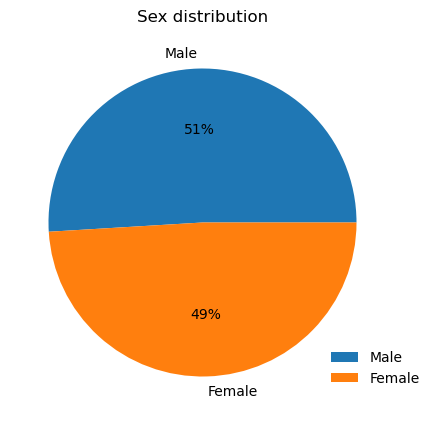

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots(1, figsize=(5,5))
ax.pie(sex_proportions, labels=["Male", "Female"], autopct='%0.f%%')
plt.title("Sex distribution")
plt.legend(bbox_to_anchor=(0.8,0.2), frameon=0)
fig.savefig('Images/sex-distribution.png', format='png')

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Tried creating a sublist containing final tumor volumes and max timepoints
# Ignore below
# def find_final_tumor_vol(drugs):
#     drugs_of_interest_final_vol = []
#     for drug in drugs:
#         mouse_id_temp_df_sub = df_complete[df_complete['Drug Regimen'] == drug]
#         tumor_vol = mouse_id_temp_df_sub.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'max',
#                                                                     'Timepoint': 'max'})
#         drugs_of_interest_final_vol.append({drug: tumor_vol})
#     return drugs_of_interest_final_vol
# four_drugs = find_final_tumor_vol(drugs_of_interest)
# four_drugs

# Aggregate each mouse
mouse_id_df = df_complete.groupby(['Mouse ID'])['Timepoint'].agg('max')
mouse_id_df.head

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_final_tumor_vols = pd.merge(df_complete, mouse_id_df, on=['Mouse ID', 'Timepoint'], how='inner')
df_final_tumor_vols.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
def get_final_tumor_vol(drugs):
    drug_final_tumor_vol = {}
    for drug in drugs:
        drug_final_tumor_vol[drug] = []
        for index, row in df_final_tumor_vols.iterrows():
            if row['Drug Regimen'] == drug:
                drug_final_tumor_vol[drug].append(row['Tumor Volume (mm3)'])
    drug_final_tumor_vol = pd.DataFrame(drug_final_tumor_vol)
    return drug_final_tumor_vol 
tumor_sub_df = get_final_tumor_vol(drugs_of_interest)
tumor_sub_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quantiles_list = [0.25, 0.50, 0.75]
def get_quartiles(drug_dictionary, qrts):
    drug_qrts = {}
    drug_qrts['Quartiles'] = qrts
    for drug in drug_dictionary:
        drug_qrts[drug] = []
        for quantile in qrts:
            values = drug_dictionary[drug]
            qrt = np.quantile(values, quantile)
            drug_qrts[drug].append(qrt)
    drug_qrts = pd.DataFrame(drug_qrts)
    return drug_qrts

# Run function to get Quartiles
drugs_cric = (get_quartiles(tumor_sub_df, quantiles_list))
drugs_cric.head()

,Quartiles,Capomulin,Ramicane,Infubinol,Ceftamin
0,0.25,32.377357,31.560470,54.048608,48.722078
1,0.50,38.125164,36.561652,60.165180,59.851956
2,0.75,40.159220,40.659006,65.525743,64.299830


In [16]:
# Calculate IQR
IQR_capomulin = (drugs_cric['Capomulin'].max()) - (drugs_cric['Capomulin'].min())
IQR_ramicane = (drugs_cric['Ramicane'].max()) - (drugs_cric['Ramicane'].min())
IQR_infubinol = (drugs_cric['Infubinol'].max()) - (drugs_cric['Infubinol'].min())
IQR_ceftamin = (drugs_cric['Ceftamin'].max()) - (drugs_cric['Ceftamin'].min())
IQR_capomulin_outlier_upper = (drugs_cric['Capomulin'].max()) + (IQR_capomulin * 1.5) 
IQR_capomulin_outlier_lower = (drugs_cric['Capomulin'].min()) - (IQR_capomulin * 1.5)
IQR_ramicane_outlier_upper = (drugs_cric['Ramicane'].max()) +(IQR_ramicane * 1.5)
IQR_ramicane_outlier_lower = (drugs_cric['Ramicane'].min()) - (IQR_ramicane * 1.5)
IQR_infubino_outlier_upper = (drugs_cric['Infubinol'].max()) + (IQR_infubinol * 1.5)
IQR_infubino_outlier_lower = (drugs_cric['Infubinol'].min()) - (IQR_infubinol * 1.5)
IQR_ceftamin_outlier_upper = (drugs_cric['Ceftamin'].max()) + (IQR_ceftamin * 1.5)
IQR_ceftamin_outlier_lower = (drugs_cric['Ceftamin'].min()) - (IQR_ceftamin * 1.5)

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
print("// Capomulin Summary //")
print(f"IQR of Capomulin is {IQR_capomulin}")
print(f"The upper limit of Capomulin is {IQR_capomulin_outlier_upper}")
print(f"The lower limit of Capomulin is {IQR_capomulin_outlier_lower}")
print("")
print("// Ramicane Summary // ")
print(f"IQR of Ramicane is {IQR_ramicane}")
print(f"The upper limit of Ramicane is {IQR_ramicane_outlier_upper}")
print(f"The lower limit of Ramicane is {IQR_ramicane_outlier_lower}")
print("")
print("// Infubinol Summary //")
print(f"IQR of Infubinol is {IQR_infubinol}")
print(f"The upper limit of Infubinol is {IQR_infubino_outlier_upper}")
print(f"The lower limit of Infubinol is {IQR_infubino_outlier_lower}")
print("")
print("// Ceftamin Summary //")
print(f"IQR of Ceftamin is {IQR_ceftamin}")
print(f"The upper limit of Ceftamin is {IQR_ceftamin_outlier_upper}")
print(f"The lower limit of Ceftamin is {IQR_ceftamin_outlier_lower}")





// Capomulin Summary //
IQR of Capomulin is 7.781863460000004
The upper limit of Capomulin is 51.83201549
The lower limit of Capomulin is 20.70456164999999

// Ramicane Summary // 
IQR of Ramicane is 9.098536719999998
The upper limit of Ramicane is 54.30681135
The lower limit of Ramicane is 17.912664470000003

// Infubinol Summary //
IQR of Infubinol is 11.477135160000003
The upper limit of Infubinol is 82.74144559000001
The lower limit of Infubinol is 36.83290494999999

// Ceftamin Summary //
IQR of Ceftamin is 15.577752179999997
The upper limit of Ceftamin is 87.66645829999999
The lower limit of Ceftamin is 25.355449580000002


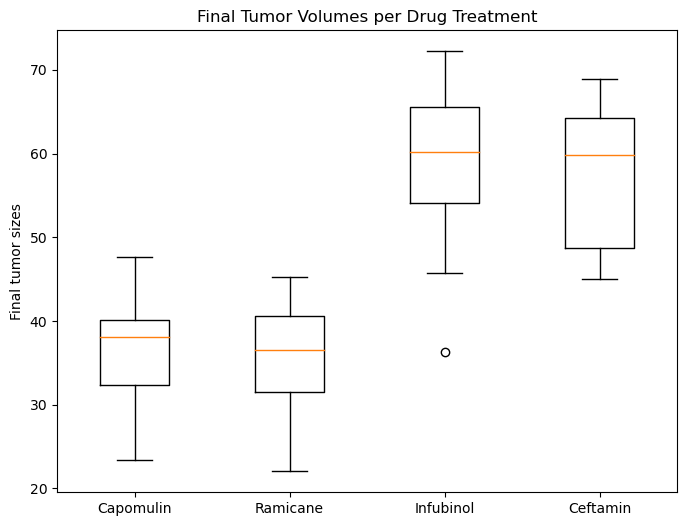

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
%matplotlib inline
fig0, ax0 = plt.subplots(figsize=(8,6))
ax0.boxplot(x=tumor_sub_df, labels=drugs_of_interest, vert=True)
ax0.set_ylabel("Final tumor sizes")
ax0.set_title("Final Tumor Volumes per Drug Treatment")
fig0.savefig('Images/final-tumor-vols.png', format='png')

## Line and Scatter Plots

In [18]:
# View plot with mice treated with Capomulin
df_Capomulin_all_timepoints = df_complete[df_complete['Drug Regimen'] == 'Capomulin']
df_Capomulin_all_timepoints.head

df_Capomulin_endpoints = df_final_tumor_vols[df_final_tumor_vols['Drug Regimen'] == 'Capomulin']
df_Capomulin_endpoints.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,b128,Capomulin,Female,9,22,45,38.982878,2
24,b742,Capomulin,Male,7,21,45,38.939633,0
61,f966,Capomulin,Male,16,17,20,30.485985,0
64,g288,Capomulin,Male,3,19,45,37.074024,1
66,g316,Capomulin,Female,22,22,45,40.159220,2
80,i557,Capomulin,Female,1,24,45,47.685963,1
83,i738,Capomulin,Female,23,20,45,37.311846,2
85,j119,Capomulin,Female,7,23,45,38.125164,1
87,j246,Capomulin,Female,21,21,35,38.753265,1
108,l509,Capomulin,Male,17,21,45,41.483008,3


In [19]:
# Isolate mouse b128 data
b128 = df_Capomulin_all_timepoints[df_Capomulin_all_timepoints['Mouse ID'] == 'b128']
b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


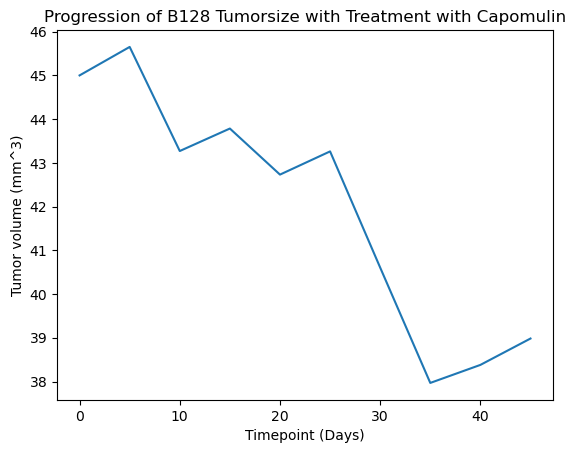

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
fig1, ax1 = plt.subplots()
ax1.plot(b128['Timepoint'], b128['Tumor Volume (mm3)'])
ax1.set_title("Progression of B128 Tumorsize with Treatment with Capomulin")
ax1.set_xlabel("Timepoint (Days)")
ax1.set_ylabel("Tumor volume (mm^3)")
fig1.savefig('Images/b128-progression.png', format='png')

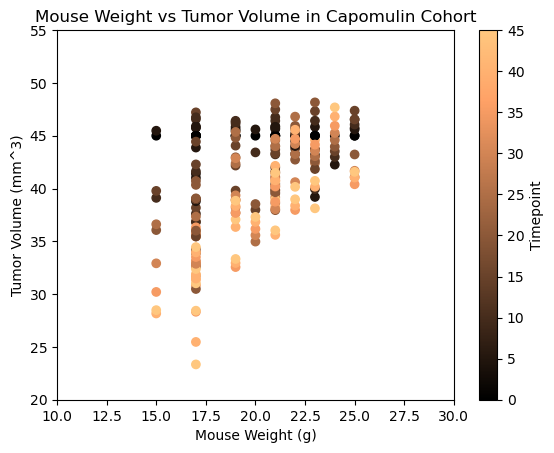

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig2, ax2 = plt.subplots()
ax2.scatter(df_Capomulin_all_timepoints['Weight (g)'], df_Capomulin_all_timepoints['Tumor Volume (mm3)'], c=df_Capomulin_all_timepoints['Timepoint'], cmap='copper')
ax2.set_xticks(ticks=(np.arange(0, 50, 2.5)))
ax2.set_yticks(ticks=(np.arange(0, 75, 5)))
ax2.set_xlim(10,30)
ax2.set_ylim(20,55)
ax2.set_title("Mouse Weight vs Tumor Volume in Capomulin Cohort")
ax2.set_xlabel("Mouse Weight (g)")
ax2.set_ylabel("Tumor Volume (mm^3)")
# Next two lines are adapted from documentation on coloarbars
sm = plt.cm.ScalarMappable(cmap='copper', norm=plt.Normalize(vmin=df_Capomulin_all_timepoints['Timepoint'].min(), vmax=df_Capomulin_all_timepoints['Timepoint'].max()))
sm.set_array([])
cbr = fig2.colorbar(sm, ax=ax2)
cbr.set_label('Timepoint')
fig2.savefig('Images/Capomulin-cohort-progression.png', format='png')

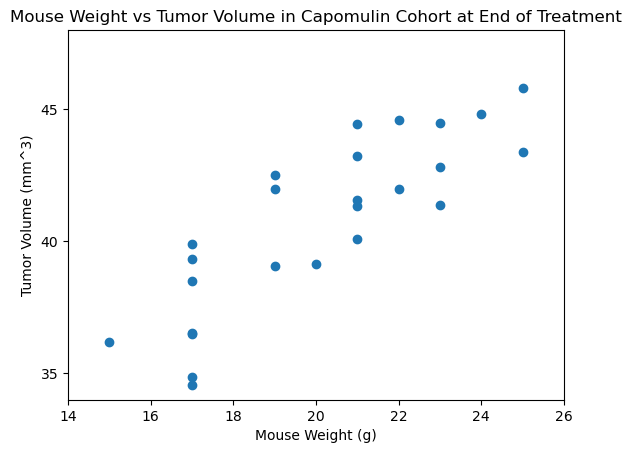

In [22]:
# Aggregate Capomulin endpoints df averages for each mouse ID
df_Capomulin_averages = df_Capomulin_all_timepoints.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
df_Capomulin_averages
fig3, ax3 = plt.subplots()
ax3.scatter(df_Capomulin_averages['Weight (g)'], df_Capomulin_averages['Tumor Volume (mm3)'])
ax3.set_xticks(ticks=(np.arange(0, 30, 2)))
ax3.set_yticks(ticks=(np.arange(0, 75, 5)))
ax3.set_xlim(14,26)
ax3.set_ylim(34,48)
ax3.set_title("Mouse Weight vs Tumor Volume in Capomulin Cohort at End of Treatment")
ax3.set_xlabel("Mouse Weight (g)")
ax3.set_ylabel("Tumor Volume (mm^3)")
fig3.savefig('Images/Capomulin-cohort-avg-endpoints.png', format='png')

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coeff, pval = st.pearsonr(df_Capomulin_averages['Weight (g)'], df_Capomulin_averages['Tumor Volume (mm3)'])
print(f'Correlation between Mouse Weight and Average Tumor Size: {correlation_coeff}')
print(f'P-value between Mouse Weight and Average Tumor Size: {pval}')


Correlation between Mouse Weight and Average Tumor Size: 0.841936342469472
P-value between Mouse Weight and Average Tumor Size: 1.3225722434712608e-07


In [24]:
# Linear regression model
# Slope, intercept, rval, pval, sterr, inter_stderr
cap_cohort_lingress = []
cap_cohort_lingress = st.linregress(df_Capomulin_averages['Weight (g)'], 
                                    df_Capomulin_averages['Tumor Volume (mm3)'])

# Regression Visualization
lin_regress = cap_cohort_lingress[0] * df_Capomulin_averages['Weight (g)'] + cap_cohort_lingress[1]
lin_regress_eq = f'y = {round(lin_regress[0], 2)}x + {round(cap_cohort_lingress[1], 2)}'
# Making fig3 copy
fig3_lin_regress = fig3
ax3_lin_regress= ax3
ax3_lin_regress.plot(df_Capomulin_averages['Weight (g)'], lin_regress, color='red', label=lin_regress_eq)
ax3_lin_regress.legend(frameon=True, loc='best', markerscale=0)
fig3_lin_regress.savefig('Images/Capomulin-cohort-avg-endpoints-regression.png', format='png')

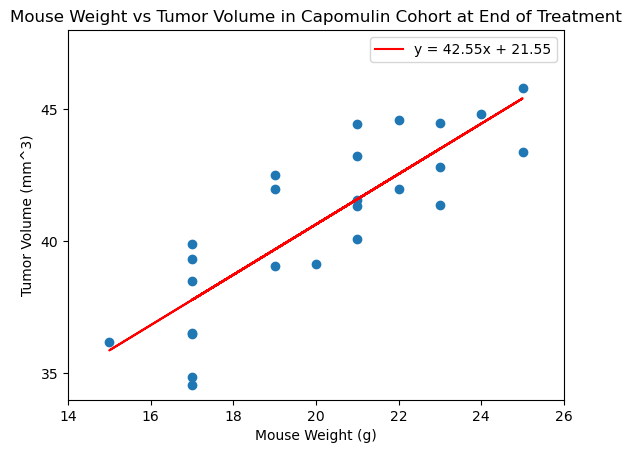

In [25]:
fig3_lin_regress